In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /data/s2965003/.conda

In [29]:
from fastai.vision import *
from fastai.metrics import error_rate,Precision,Recall,FBeta
import disarray

In [5]:
import torch
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"

In [6]:
bs = 32
path = Path('/data/s2965003/genre_images_pitch/data/train')
data = ImageDataBunch.from_folder(path, train="/data/s2965003/genre_images_pitch/data/train", valid_pct=0.2, size=256, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['Blues',
 'Country',
 'Electronic',
 'Folk',
 'Jazz',
 'Latin',
 'Metal',
 'New Age',
 'Pop',
 'Punk',
 'Rap',
 'Reggae',
 'RnB',
 'Rock',
 'World']

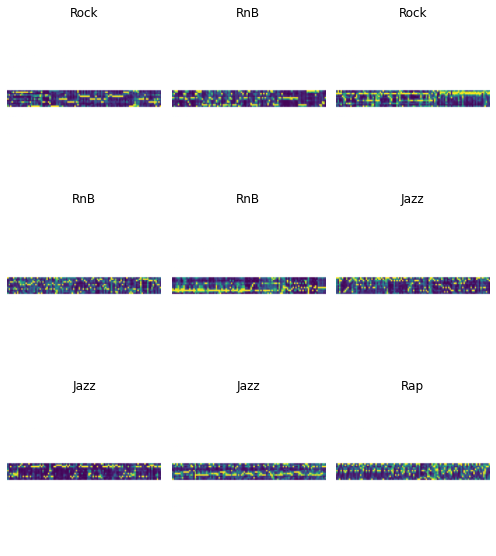

In [8]:
data.show_batch(rows=3, figsize=(7,8))

## With ResNet34

In [10]:
learn = create_cnn(data, models.resnet34, metrics=[error_rate,Precision(),Recall(),FBeta()])

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [11]:
??create_cnn

In [12]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,f_beta,time
0,3.271849,2.440564,0.672235,nan,nan,0.155402,08:45
1,2.517519,2.004444,0.618138,nan,nan,0.000000,03:09
2,1.947158,1.879391,0.591090,nan,nan,0.000000,03:04
3,1.635774,1.878729,0.581543,nan,nan,0.000000,03:04
4,1.431808,1.853316,0.599045,nan,nan,0.000000,03:04


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-2))

epoch,train_loss,valid_loss,error_rate,precision,recall,f_beta,time
0,35.418114,82.193146,0.883850,nan,nan,0.050277,03:03
1,19.804146,43.681690,0.644391,nan,nan,0.000000,03:03
2,13.065571,672.054321,0.605410,nan,nan,0.000000,03:06
3,9.428824,565.573669,0.584726,nan,nan,0.000000,03:04
4,7.955532,345.631500,0.590294,nan,nan,0.000000,03:05


In [17]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
print(losses)
len(data.valid_ds)==len(losses)==len(idxs)

tensor([321675.6875,  74526.5703,  25662.5430,  ...,     -0.0000,
            -0.0000,     -0.0000])


True

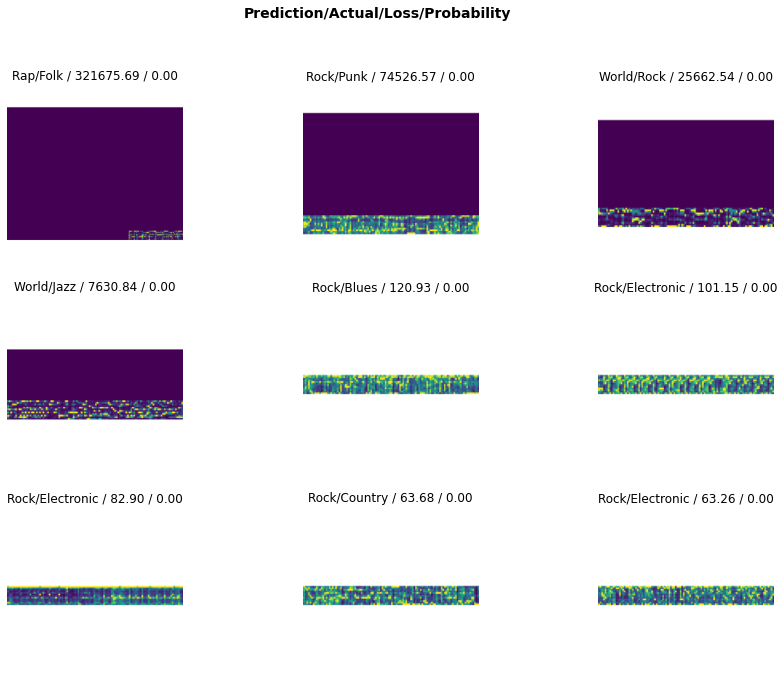

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,micro-average
accuracy,0.914877,0.905330,0.98568,0.9642,0.820207,0.998409,0.966587,1.0,0.906921,0.97852,0.997613,0.980907,0.895784,0.509149,0.995227,0.921294
f1,NaN,0.032520,NaN,NaN,0.471963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015038,0.571230,NaN,0.409706
false_discovery_rate,NaN,0.714286,NaN,NaN,0.572034,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.937500,0.586935,1.000000,0.590294
false_negative_rate,1.000000,0.982759,1.00000,1.0000,0.473958,1.000000,1.000000,NaN,1.000000,1.00000,1.000000,1.000000,0.991453,0.074324,1.000000,0.590294
false_positive_rate,0.000000,0.004382,0.00000,0.0000,0.126761,0.000000,0.000000,0.0,0.000000,0.00000,0.000797,0.000000,0.013158,0.718327,0.001596,0.042164
negative_predictive_value,0.914877,0.908800,0.98568,0.9642,0.910872,0.998409,0.966587,1.0,0.906921,0.97852,0.998408,0.980907,0.906527,0.874046,0.996813,0.957836
positive_predictive_value,NaN,0.285714,NaN,NaN,0.427966,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.062500,0.413065,0.000000,0.409706
precision,NaN,0.285714,NaN,NaN,0.427966,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.062500,0.413065,0.000000,0.409706
recall,0.000000,0.017241,0.00000,0.0000,0.526042,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.008547,0.925676,0.000000,0.409706
sensitivity,0.000000,0.017241,0.00000,0.0000,0.526042,0.000000,0.000000,NaN,0.000000,0.00000,0.000000,0.000000,0.008547,0.925676,0.000000,0.409706


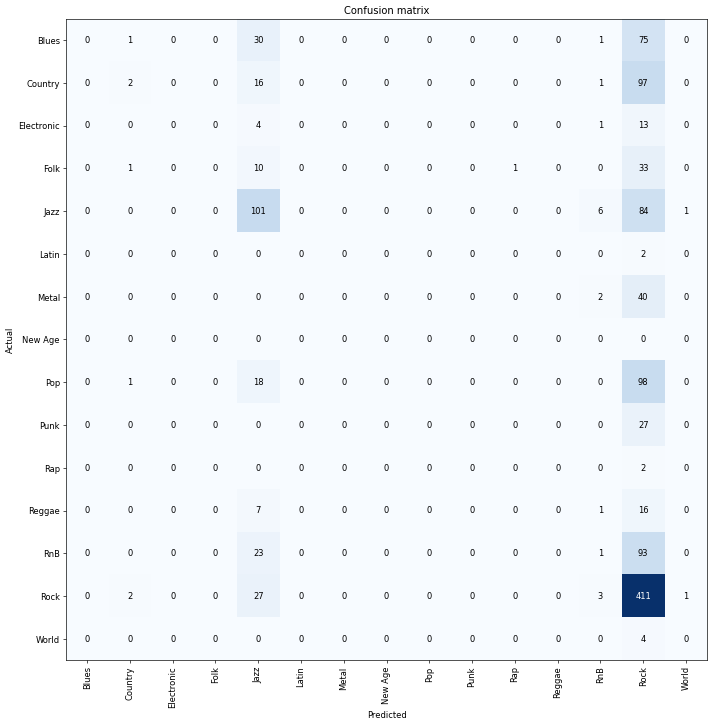

In [30]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()

## With ResNet50

In [31]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate,Precision(),Recall()])
#learn.model = torch.nn.DataParallel(learn.model)

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [32]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,3.311539,2.639651,0.654733,nan,nan,03:06
1,2.421632,2.083343,0.633254,nan,nan,03:06
2,1.886315,2.020142,0.595068,nan,nan,03:05
3,1.534281,1.999962,0.600636,nan,nan,03:06
4,1.316785,1.970875,0.592681,nan,nan,03:09


/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


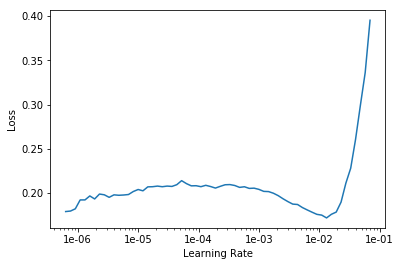

In [26]:
learn.lr_find()
learn.recorder.plot()

In [33]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,precision,recall,time
0,1.939011,2.476924,0.613365,nan,nan,03:07
1,2.002935,184.383820,0.809865,nan,nan,03:08
2,1.942965,1.951155,0.585521,nan,nan,03:05
3,1.775553,4.068505,0.636436,nan,nan,03:11
4,1.578359,1.939694,0.566428,nan,nan,03:10


In [34]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

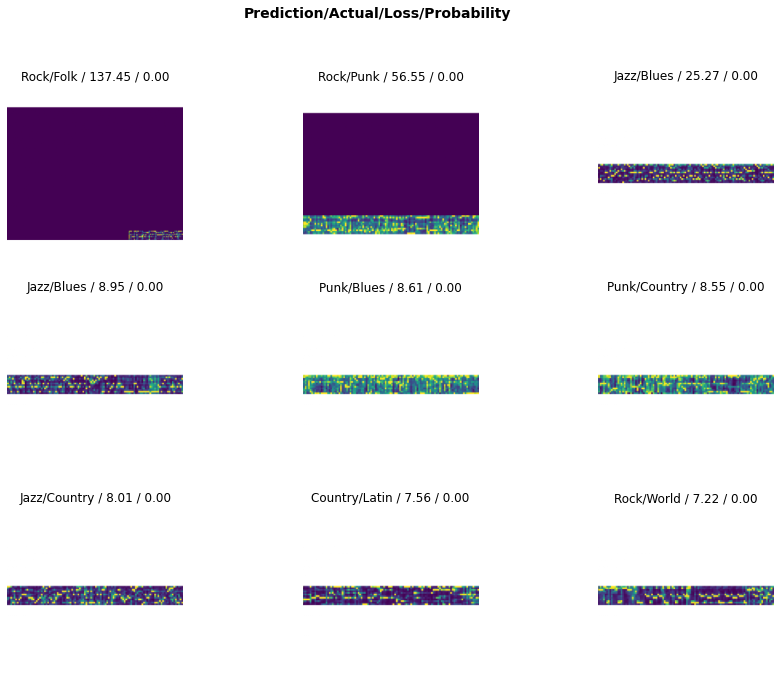

In [35]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,micro-average
accuracy,0.886237,0.873508,0.984089,0.9642,0.888624,0.998409,0.967383,1.0,0.896579,0.974543,0.998409,0.980907,0.875895,0.581543,0.996818,0.924476
f1,0.218579,0.216749,NaN,NaN,0.597701,NaN,0.046512,NaN,0.084507,0.111111,NaN,NaN,0.093023,0.592248,NaN,0.433572
false_discovery_rate,0.736842,0.747126,1.000000,NaN,0.333333,NaN,0.000000,NaN,0.760000,0.777778,NaN,NaN,0.854545,0.548463,NaN,0.566428
false_negative_rate,0.813084,0.810345,1.000000,1.0000,0.458333,1.000000,0.976190,NaN,0.948718,0.925926,1.000000,1.000000,0.931624,0.139640,1.000000,0.566428
false_positive_rate,0.048696,0.056968,0.001614,0.0000,0.048826,0.000000,0.000000,0.0,0.016667,0.005691,0.000000,0.000000,0.041228,0.570726,0.000000,0.040459
negative_predictive_value,0.926334,0.919658,0.985657,0.9642,0.920073,0.998409,0.967357,1.0,0.909903,0.979968,0.998409,0.980907,0.909318,0.849148,0.996818,0.959541
positive_predictive_value,0.263158,0.252874,0.000000,NaN,0.666667,NaN,1.000000,NaN,0.240000,0.222222,NaN,NaN,0.145455,0.451537,NaN,0.433572
precision,0.263158,0.252874,0.000000,NaN,0.666667,NaN,1.000000,NaN,0.240000,0.222222,NaN,NaN,0.145455,0.451537,NaN,0.433572
recall,0.186916,0.189655,0.000000,0.0000,0.541667,0.000000,0.023810,NaN,0.051282,0.074074,0.000000,0.000000,0.068376,0.860360,0.000000,0.433572
sensitivity,0.186916,0.189655,0.000000,0.0000,0.541667,0.000000,0.023810,NaN,0.051282,0.074074,0.000000,0.000000,0.068376,0.860360,0.000000,0.433572


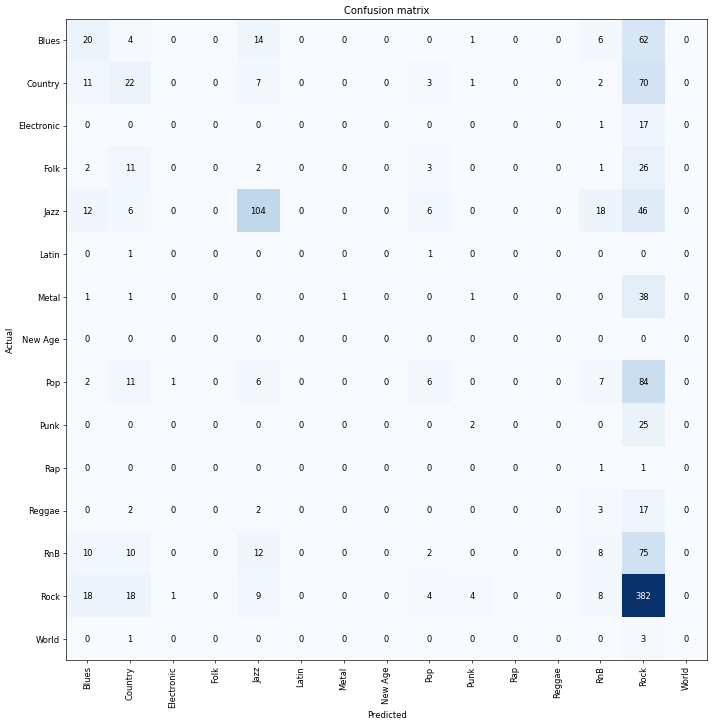

In [36]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()

## With SqueezeNet

In [37]:
learn = create_cnn(data, models.squeezenet1_0, metrics=accuracy)

/data/s2965003/.conda/envs/py38/lib/python3.8/site-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [38]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,3.285002,2.471730,0.377088,03:07
1,2.466370,2.474770,0.415274,03:08
2,1.971028,2.317147,0.390613,03:08
3,1.676400,2.410105,0.402546,03:07
4,1.503273,2.255575,0.392999,03:07


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


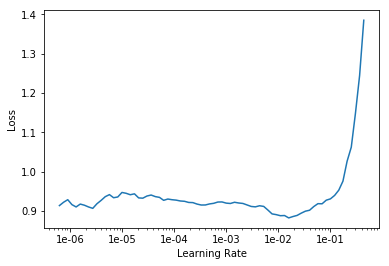

In [36]:
learn.lr_find()
learn.recorder.plot()

In [39]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,2.022393,26.150932,0.002387,03:05
1,2.083120,2.439048,0.381066,03:03
2,1.972809,2.668173,0.291965,03:02
3,1.803208,2.294805,0.318218,03:02
4,1.697621,2.046182,0.431185,03:02


In [40]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

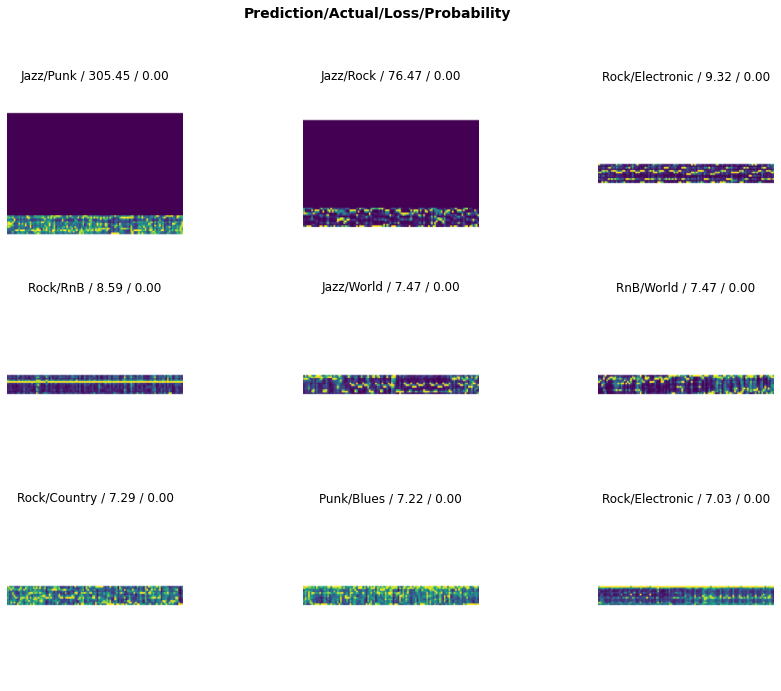

In [41]:
interp.plot_top_losses(9, figsize=(15,11))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,micro-average
accuracy,0.908512,0.902148,0.986476,0.9642,0.830549,0.998409,0.966587,1.0,0.893397,0.974543,0.998409,0.980907,0.881464,0.579952,0.996818,0.924158
f1,NaN,0.046512,0.105263,NaN,0.566191,NaN,NaN,NaN,0.082192,NaN,NaN,NaN,0.128655,0.591331,NaN,0.431185
false_discovery_rate,1.000000,0.769231,0.000000,NaN,0.535117,NaN,NaN,NaN,0.793103,1.000000,NaN,NaN,0.796296,0.549528,NaN,0.568815
false_negative_rate,1.000000,0.974138,0.944444,1.0000,0.276042,1.000000,1.000000,NaN,0.948718,1.000000,1.000000,1.000000,0.905983,0.139640,1.000000,0.568815
false_positive_rate,0.006957,0.008764,0.000000,0.0000,0.150235,0.000000,0.000000,0.0,0.020175,0.004065,0.000000,0.000000,0.037719,0.573186,0.000000,0.040630
negative_predictive_value,0.914331,0.909164,0.986465,0.9642,0.944676,0.998409,0.966587,1.0,0.909609,0.978435,0.998409,0.980907,0.911887,0.848411,0.996818,0.959370
positive_predictive_value,0.000000,0.230769,1.000000,NaN,0.464883,NaN,NaN,NaN,0.206897,0.000000,NaN,NaN,0.203704,0.450472,NaN,0.431185
precision,0.000000,0.230769,1.000000,NaN,0.464883,NaN,NaN,NaN,0.206897,0.000000,NaN,NaN,0.203704,0.450472,NaN,0.431185
recall,0.000000,0.025862,0.055556,0.0000,0.723958,0.000000,0.000000,NaN,0.051282,0.000000,0.000000,0.000000,0.094017,0.860360,0.000000,0.431185
sensitivity,0.000000,0.025862,0.055556,0.0000,0.723958,0.000000,0.000000,NaN,0.051282,0.000000,0.000000,0.000000,0.094017,0.860360,0.000000,0.431185


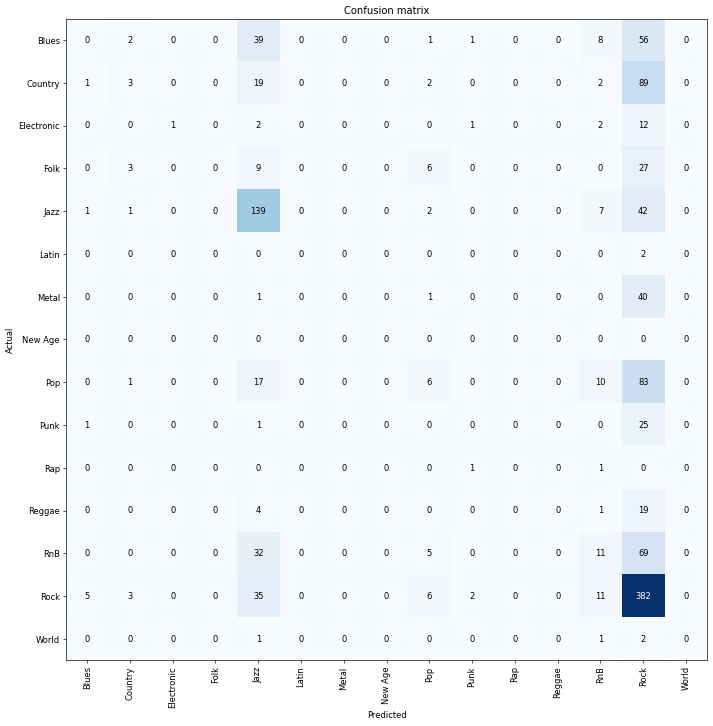

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)
cm=interp.confusion_matrix()
df = pd.DataFrame(cm)
df.da.export_metrics()